# **SOAL 2**

In [ ]:
import pandas as pd

# Membaca file CSV
superstore_data = pd.read_csv('superstore.csv')
superstore_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14573,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028
14574,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332
14575,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932
14576,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4.0,0.00,13.3200


In [ ]:
# Mencari rata-rata penjualan
average_sales = superstore_data['Sales'].mean()
print("Avegare Sales : ", average_sales)

Avegare Sales :  232.51957996066432


In [ ]:
# Membuat segmentasi penjualan
# penjualan < persentil 0.25 --> low
# penjualan > rata-rata -> high
# persentil 0.25 < medium < diatas rata-rata

low_threshold = superstore_data['Sales'].quantile(0.25)

def segmentasi_customer(row):
    if row['Sales'] > average_sales:
        return 'High'
    elif row['Sales'] < low_threshold:
        return 'Low'
    else:
        return 'Medium'

superstore_data['Segment'] = superstore_data.apply(segmentasi_customer, axis=1)

# Menampilkan DataFrame dengan kolom 'Segment' baru
print(superstore_data[['Customer ID', 'Sales', 'Segment']])

     Customer ID     Sales Segment
0       CG-12520  261.9600    High
1       CG-12520  731.9400    High
2       DV-13045   14.6200     Low
3       SO-20335  957.5775    High
4       SO-20335   22.3680  Medium
...          ...       ...     ...
4572    AB-10255  479.9840    High
4573    MG-17650  657.9300    High
4574    MG-17650   33.4800  Medium
4575    MG-17650   13.9000     Low
4576    MG-17650       NaN  Medium

[4577 rows x 3 columns]


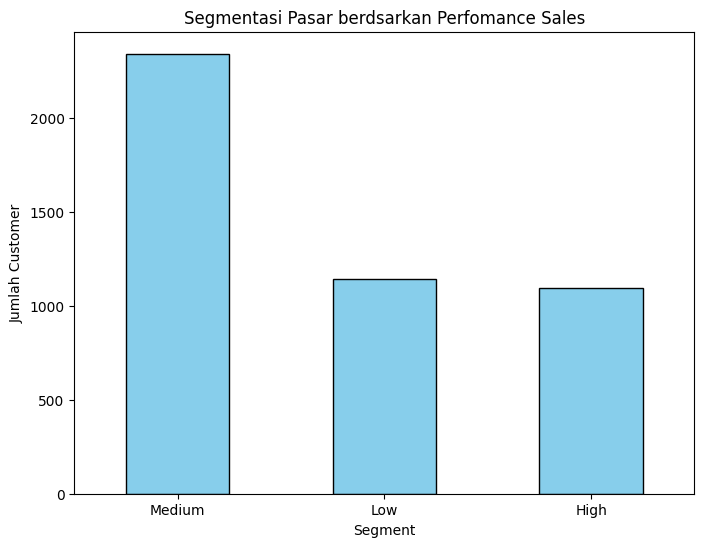

In [ ]:
# Visualisasikan Customer Superstore berdasarkan Segment
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

segment_counts = superstore_data['Segment'].value_counts()

segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Segmentasi Pasar berdsarkan Perfomance Sales')
plt.xlabel('Segment')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=0)
plt.show()

Dalam strategi pengambilan ini, segmentasi dibagi berdasarkan pada nilai rata-rata dan nilai persentil. Nilai rata-rata untuk mengidentifikasi segment 'High' pada pelanggan yang pembeliannya diatas rata-rata. Nilai persentil untuk mengidentifikasi segment 'Low' pada pelenggan yang pembeliannya 25% dibawah. Pelanggan segment 'Medium' di identifikasi dengan nilai pembelian diatara 0.25 percentil dan nilai rerate.

**Jumlah Pembelian pada Masing-masing Segmen Tahun 2017**

In [ ]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Memfilter data untuk hanya tahun 2017
data_2017 = superstore_data[superstore_data['Order Date'].dt.year == 2017]

# Menghitung jumlah pelanggan di setiap segmen pada tahun 2017
segment_counts_2017 = data_2017['Segment'].value_counts()

# Menampilkan hasil jumlah pelanggan di setiap segmen
print(segment_counts_2017)

Medium    767
Low       374
High      339
Name: Segment, dtype: int64


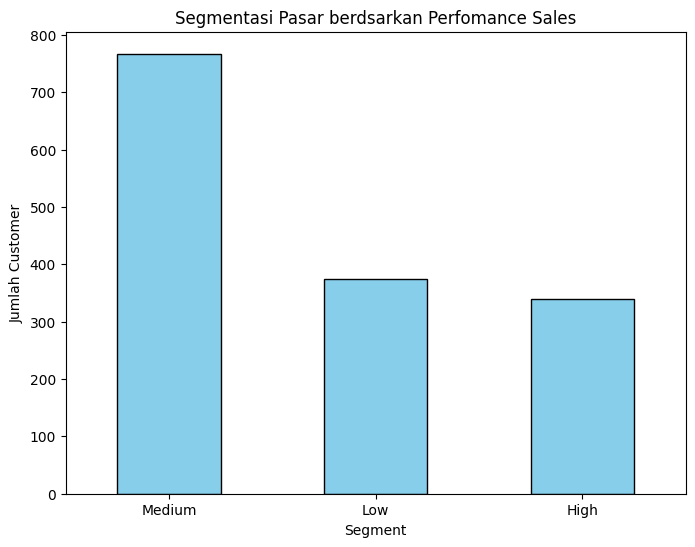

In [ ]:
# Visualisasikan Customer 2017 Superstore berdasarkan Segment
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

segment_counts_2017.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Segmentasi Pasar berdsarkan Perfomance Sales')
plt.xlabel('Segment')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=0)
plt.show()